In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import homogeneity_score, silhouette_score, accuracy_score, silhouette_samples

from collections import Counter
from tqdm import tqdm
import os
import shutil
from sklearn.cluster import AgglomerativeClustering, DBSCAN

In [3]:
x_train = pd.read_csv("x_train_all.csv")
y_train = pd.read_csv("y_train_all.csv")
x_test = pd.read_csv("x_test_all.csv")
y_test = pd.read_csv("y_test_all.csv")

# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9690, 2304)
(3090, 2304)
(9690, 1)
(3090, 1)


In [4]:
# Convert Pandas DataFrames to NumPy arrays
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()

# Reshape x_train and x_test to 2D arrays
x_train_reshaped = x_train_np.reshape(x_train_np.shape[0], -1)
x_test_reshaped = x_test_np.reshape(x_test_np.shape[0], -1)

In [5]:
x_train_reshaped.shape, x_test_reshaped.shape

((9690, 2304), (3090, 2304))

In [6]:
# Scale pixel values to the [0, 1] range
x_train_scaled = x_train_reshaped / 255.0
x_test_scaled = x_test_reshaped / 255.0

x_train_scaled.shape, x_test_scaled.shape

((9690, 2304), (3090, 2304))

In [7]:
# Choose the number of clusters (K)
K = 10  # You can adjust this value as needed

# Perform K-means clustering on x_train
kmeans = KMeans(n_clusters=K, random_state=42)
cluster_labels = kmeans.fit_predict(x_train_scaled)

# Optionally, you can also assign x_test data to clusters:
test_cluster_labels = kmeans.predict(x_test_scaled)

/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
# If you want to see the distribution of images in each cluster:
from collections import Counter

cluster_counts = Counter(cluster_labels)
print("Number of images in each training data cluster:")
print(cluster_counts)

Number of images in each training data cluster:
Counter({9: 1996, 1: 1696, 8: 1315, 0: 1029, 3: 968, 6: 761, 5: 533, 4: 499, 7: 466, 2: 427})


In [9]:
# If you want to see the distribution of images in each cluster:
from collections import Counter

test_cluster_counts = Counter(test_cluster_labels)
print("Number of images in each testing data cluster:")
print(test_cluster_counts)

Number of images in each testing data cluster:
Counter({9: 692, 1: 650, 8: 419, 0: 340, 3: 293, 6: 197, 4: 168, 2: 157, 7: 92, 5: 82})


# K-means Clustering

### Elbow Method

/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

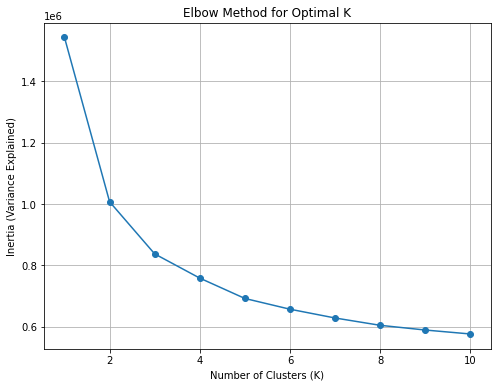

In [21]:
# Define a range of K values to test
k_values = range(1, 11)  # You can adjust this range as needed

# Initialize empty lists to store K values and inertia scores
k_values_list = []
inertia_scores = []

# Run K-means for each K value and record the inertia (variance explained)
for K in k_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(x_train_scaled)  # Adjust this to your data
    k_values_list.append(K)
    inertia_scores.append(kmeans.inertia_)

# Create a Pandas DataFrame to display the results
results_df = pd.DataFrame({'K': k_values_list, 'Inertia (Variance Explained)': inertia_scores})

# Plot the variance explained as a function of K
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_scores, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Variance Explained)')
plt.grid(True)
plt.show()

### Silhouette plot

/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of images in each cluster:
Counter({9: 1996, 1: 1696, 8: 1315, 0: 1029, 3: 968, 6: 761, 5: 533, 4: 499, 7: 466, 2: 427})
Silhouette Score: 0.13167132623580743
Silhouette Score for Training Data: 0.13167132623580743


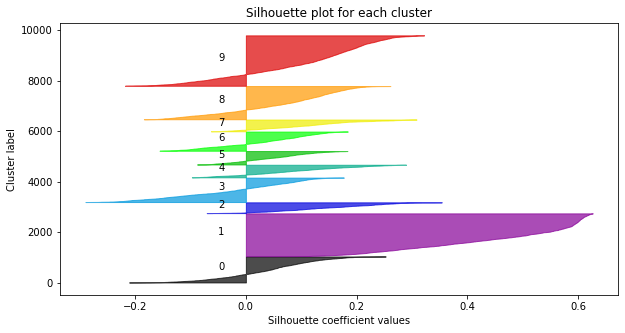

In [22]:
# Convert Pandas DataFrames to NumPy arrays
x_train_np = x_train.to_numpy()
x_test_np = x_test.to_numpy()

# Reshape x_train and x_test to 2D arrays
x_train_reshaped = x_train_np.reshape(x_train_np.shape[0], -1)
x_test_reshaped = x_test_np.reshape(x_test_np.shape[0], -1)

# Scale pixel values to the [0, 1] range
x_train_scaled = x_train_reshaped / 255.0
x_test_scaled = x_test_reshaped / 255.0

# Choose the number of clusters (K)
K = 10  # You can adjust this value as needed

# Perform K-means clustering on x_train
kmeans = KMeans(n_clusters=K, random_state=42)
cluster_labels = kmeans.fit_predict(x_train_scaled)

# Optionally, you can also assign x_test data to clusters:
test_cluster_labels = kmeans.predict(x_test_scaled)

# If you want to see the distribution of images in each cluster:
from collections import Counter

cluster_counts = Counter(cluster_labels)
print("Number of images in each cluster:")
print(cluster_counts)

# You can also access the cluster centroids if needed
cluster_centers = kmeans.cluster_centers_

# Optionally, save the cluster assignments with their corresponding labels (y_train)
cluster_assignments = np.column_stack((cluster_labels, y_train))

# Calculate the Silhouette Score for the entire clustering
silhouette_avg = silhouette_score(x_train_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate the Silhouette Score for the training data
silhouette_avg_train = silhouette_score(x_train_scaled, cluster_labels)
print(f"Silhouette Score for Training Data: {silhouette_avg_train}")

# Optionally, you can compute the silhouette scores for individual samples:
sample_silhouette_values = silhouette_samples(x_train_scaled, cluster_labels)

# Visualize the silhouette scores for individual samples if needed
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
y_lower = 10

for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / K)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.title("Silhouette plot for each cluster")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

plt.show()

### Homogeneity score, Silhouette Score & K-means score 

In [23]:
# Define a range of K values to test
k_values = range(2, 11)  # You can adjust this range as needed

# Initialize empty lists to store K values and evaluation metrics
k_values_list = []
homogeneity_scores = []
silhouette_scores = []
homogeneity_per_cluster = []  # Store homogeneity scores for each cluster
kmeans_scores = []

# Flatten or reshape y_train to a 1D array
y_train_flat = y_train.values.ravel()

# Run K-means for each K value and record the evaluation metrics
for K in k_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    cluster_labels = kmeans.fit_predict(x_train_scaled)  # Adjust this to your data
    k_values_list.append(K)
    
    # Homogeneity score
    homogeneity = homogeneity_score(y_train_flat, cluster_labels)  # Use y_train_flat
    homogeneity_scores.append(homogeneity)
    
    # Silhouette score
    silhouette = silhouette_score(x_train_scaled, cluster_labels)
    silhouette_scores.append(silhouette)
    
    # K-means score (inertia)
    kmeans_scores.append(kmeans.inertia_)
    
    # Calculate the homogeneity score for each cluster within this K value
    cluster_homogeneity = []
    for cluster in range(K):
        mask = cluster_labels == cluster
        cluster_homogeneity.append(homogeneity_score(y_train_flat[mask], cluster_labels[mask]))
    homogeneity_per_cluster.append(cluster_homogeneity)

# Create a Pandas DataFrame to display the results
results_df = pd.DataFrame({
    'K': k_values_list,
    'Homogeneity Score': homogeneity_scores,
    'Silhouette Score': silhouette_scores,
    'K-means Score': kmeans_scores,
})

/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

In [24]:
results_df.head(10)

,K,Homogeneity Score,Silhouette Score,K-means Score
0,2,0.022571,0.356843,1.007271e+06
1,3,0.048831,0.317890,8.373307e+05
2,4,0.056187,0.311564,7.584196e+05
3,5,0.077529,0.214171,6.921302e+05
4,6,0.084131,0.205789,6.570755e+05
5,7,0.102945,0.210099,6.284782e+05
6,8,0.113859,0.152749,6.046234e+05
7,9,0.117119,0.142941,5.892508e+05
8,10,0.119103,0.131671,5.763796e+05


In [25]:
# Create a K-means model with K=2
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model on your training data
kmeans.fit(x_train_scaled)

# Predict cluster labels for your test data
test_cluster_labels = kmeans.predict(x_test_scaled)


/Users/amitmakhija/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [26]:
accuracy = accuracy_score(y_test, test_cluster_labels)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 14.53%


# Heirarchical Clusering

In [27]:
# Define the number of clusters (K)
K = 2

# Perform Agglomerative Clustering for training data
model = AgglomerativeClustering(n_clusters=K)
cluster_labels = model.fit_predict(x_train_scaled)

test_cluster_labels = model.fit_predict(x_test_scaled)

In [28]:
# Calculate accuracy by comparing true labels (y_test) with predicted cluster labels (test_cluster_labels)
accuracy = accuracy_score(y_test, test_cluster_labels)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 8.16%
